In [10]:
import xarray as xr
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd

In [34]:
path = './CAPE_consumption_percentile.nc'
cape_dat = xr.open_dataset(path)
print([np.min(cape_dat['CAPE_consumption_percentile'].values),np.max(cape_dat['CAPE_consumption_percentile'].values)])
frt_dat = xr.open_dataset('./gradEPT_Frontal_percentile.nc')
print([np.min(frt_dat['gradEPT_percentile_AboveMedian'].values),np.max(frt_dat['gradEPT_percentile_AboveMedian'].values)])
vrt_dat = xr.open_dataset('./PositiveRelativeVorticityAdvection_Percentile.nc')
print([np.min(vrt_dat['PositiveRelativeVorticityAdvection_Percentile'].values),np.max(vrt_dat['PositiveRelativeVorticityAdvection_Percentile'].values)])

[0.0, 0.13983396922923907]
[0.0, 0.0004113762546720126]
[0.0, 8.383652594728558e-08]


In [3]:
region = 4
path = './DistBySeason/MetricScores_CapeVrtFrt_Region'+str(region)+'_DJF.nc'
data = xr.open_dataset(path)
cape = data['cape']
vrt = data['vrt']
frt = data['frt']

In [22]:
df1 = pd.DataFrame({'cape':cape.values,'vrt':vrt.values,'frt':frt.values})

In [26]:
np.unique(frt.values)

array([0.00000000e+00, 2.22245922e-05, 2.23875091e-05, ...,
       1.50051893e-04, 1.50287700e-04, 1.52074079e-04])

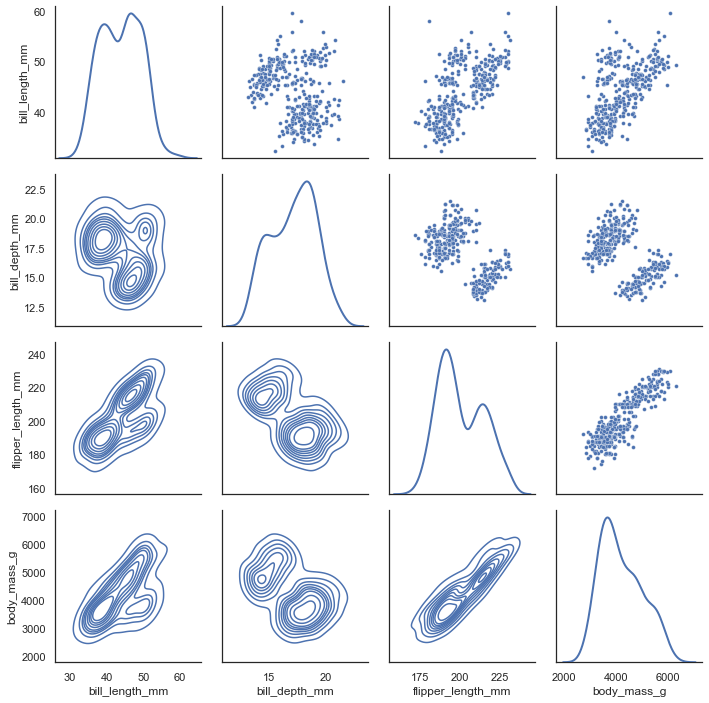

In [17]:
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [19]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
